In [1]:
# Cell 1: Data Loading and Preprocessing
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')
print(dataset_path)  # what kinds of classes are in this dataset
print("Types of classes labels found: ", len(dataset_path))
class_labels = []

for item in dataset_path:
    # Get all the file names
    all_classes = os.listdir('dataset' + '/' + item)

    # Add them to the list
    for room in all_classes:
        class_labels.append((item, 'dataset' + '/' + item + '/' + room))

# Print the first 5 elements of the class_labels list
print(class_labels[:5])


['phones', 'headphones', 'earphones', '.ipynb_checkpoints']
Types of classes labels found:  4
[('phones', 'dataset/phones/phones197.png'), ('phones', 'dataset/phones/phones86.png'), ('phones', 'dataset/phones/phones47.png'), ('phones', 'dataset/phones/phones171.png'), ('phones', 'dataset/phones/phones196.png')]


In [2]:
# Cell 2: Data Labeling and DataFrame Creation
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

# Count the number of samples for each category (label)
label_count = df['Labels'].value_counts()
print(label_count)


   Labels                         image
0  phones  dataset/phones/phones197.png
1  phones   dataset/phones/phones86.png
2  phones   dataset/phones/phones47.png
3  phones  dataset/phones/phones171.png
4  phones  dataset/phones/phones196.png
        Labels                               image
235  earphones  dataset/earphones/04FG4GFTD7DL.png
236  earphones  dataset/earphones/NPR2KQVMZB1E.png
237  earphones  dataset/earphones/FA4K09T0EXE6.png
238  earphones  dataset/earphones/COZ9D11ZNDGX.png
239  earphones  dataset/earphones/3EQPDGD8DPTM.png
Total number of images in the dataset:  240
phones        166
headphones     52
earphones      22
Name: Labels, dtype: int64


In [3]:
# Cell 3: Image Loading and Resizing
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')
im_size = 224
images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [j for j in os.listdir(data_path)]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)


In [4]:
# Cell 4: One-Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Extract labels from the 'Labels' column
y = df['Labels'].values
print("Original labels:\n", y)

# Use LabelEncoder to convert categorical labels to numerical format
y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(y)
print("Encoded labels:\n", y_encoded)

# Reshape y to have a single column
y = y_encoded.reshape(-1, 1)

# Use ColumnTransformer with OneHotEncoder to perform one-hot encoding
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y)

# Print the one-hot encoded labels
print("One-hot encoded labels (first 5):\n", Y[:5])
print("One-hot encoded labels (from index 35 onwards):\n", Y[35:])


Original labels:
 ['phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phon

In [6]:
# Cell 5: Data Splitting
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle images and labels in the same random order
images, Y = shuffle(images, Y, random_state=1)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)
train_x = np.array(train_x)
test_x = np.array(test_x)
# Inspect the shape of the training and testing sets
print("Training data shape:")
print("train_x:", train_x.shape)
print("train_y:", train_y.shape)

print("\nTesting data shape:")
print("test_x:", test_x.shape)
print("test_y:", test_y.shape)


Training data shape:
train_x: (228, 224, 224, 3)
train_y: (228, 3)

Testing data shape:
test_x: (12, 224, 224, 3)
test_y: (12, 3)


In [16]:
# Cell 7: Model Building
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=x)


16705208/16705208 [==============================] - 1s 0us/step


In [17]:
# Cell 7: Model Training
# (Note: This cell should be run after building the model in the previous cell)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10
history_fine_tune = model.fit(train_x, train_y, epochs=fine_tune_epochs, verbose=2)


Epoch 1/10
8/8 - 93s - loss: 0.3655 - accuracy: 0.8553 - 93s/epoch - 12s/step
Epoch 2/10
8/8 - 54s - loss: 0.0363 - accuracy: 0.9825 - 54s/epoch - 7s/step
Epoch 3/10
8/8 - 58s - loss: 0.0470 - accuracy: 0.9825 - 58s/epoch - 7s/step
Epoch 4/10
8/8 - 57s - loss: 0.0502 - accuracy: 0.9912 - 57s/epoch - 7s/step
Epoch 5/10
8/8 - 58s - loss: 0.0613 - accuracy: 0.9737 - 58s/epoch - 7s/step
Epoch 6/10
Epoch 7/10
8/8 - 58s - loss: 0.0102 - accuracy: 0.9956 - 58s/epoch - 7s/step
Epoch 8/10
8/8 - 58s - loss: 0.0072 - accuracy: 0.9956 - 58s/epoch - 7s/step
Epoch 9/10
8/8 - 57s - loss: 0.0041 - accuracy: 1.0000 - 57s/epoch - 7s/step
Epoch 10/10
8/8 - 57s - loss: 0.0293 - accuracy: 0.9912 - 57s/epoch - 7s/step


In [19]:
# Cell 8: Learning Rate Scheduling
# (Note: This cell should be run after training the model)

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Include lr_scheduler in the callbacks list during training
history = model.fit(train_x, train_y, epochs=30, callbacks=[lr_scheduler], verbose=2)


Epoch 1/30
8/8 - 67s - loss: 0.0017 - accuracy: 1.0000 - lr: 0.0010 - 67s/epoch - 8s/step
Epoch 2/30
8/8 - 55s - loss: 0.0017 - accuracy: 1.0000 - lr: 0.0010 - 55s/epoch - 7s/step
Epoch 3/30
8/8 - 56s - loss: 0.0056 - accuracy: 0.9956 - lr: 0.0010 - 56s/epoch - 7s/step
Epoch 4/30
8/8 - 57s - loss: 0.0014 - accuracy: 1.0000 - lr: 0.0010 - 57s/epoch - 7s/step
Epoch 5/30
8/8 - 56s - loss: 8.1124e-04 - accuracy: 1.0000 - lr: 0.0010 - 56s/epoch - 7s/step
Epoch 6/30
8/8 - 56s - loss: 3.0193e-04 - accuracy: 1.0000 - lr: 0.0010 - 56s/epoch - 7s/step
Epoch 7/30
8/8 - 56s - loss: 0.0013 - accuracy: 1.0000 - lr: 0.0010 - 56s/epoch - 7s/step
Epoch 8/30
8/8 - 56s - loss: 3.1935e-04 - accuracy: 1.0000 - lr: 0.0010 - 56s/epoch - 7s/step
Epoch 9/30
8/8 - 57s - loss: 3.3217e-04 - accuracy: 1.0000 - lr: 0.0010 - 57s/epoch - 7s/step
Epoch 10/30
8/8 - 57s - loss: 6.6987e-04 - accuracy: 1.0000 - lr: 0.0010 - 57s/epoch - 7s/step
Epoch 11/30
8/8 - 56s - loss: 5.5237e-04 - accuracy: 1.0000 - lr: 0.0010 - 56s/

In [20]:
# Cell 9: Model Evaluation
# (Note: This cell should be run after training the model)

# Evaluate your model
preds = model.evaluate(test_x, test_y)
print("Loss =", preds[0])
print("Test Accuracy =", preds[1])


1/1 [==============================] - 3s 3s/step - loss: 0.0249 - accuracy: 1.0000
Loss = 0.024901149794459343
Test Accuracy = 1.0


1/1 [==============================] - 0s 207ms/step
Probabilities for each class: [[1.0390986e-03 2.7169174e-08 9.9896085e-01]]
Predicted class: phones


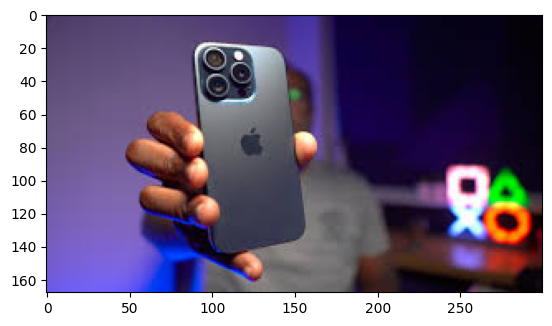

In [23]:
# Load and preprocess the test image
img_path = '/content/testimage.jpg'  # Replace with the actual path to your test image
img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
x_test = np.expand_dims(img, axis=0)
x_test = preprocess_input(x_test)

# Predict on the test image
preds = model.predict(x_test)

# Display the predicted probabilities for each class
print("Probabilities for each class:", preds)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Map the class index to the corresponding class label
class_labels = {0: 'earphones', 1: 'headphones', 2: 'phones'}  # Replace with your actual class labels

# Display the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

# Display the test image
my_image = imread(img_path)
imshow(my_image)


In [34]:
def get_local_pricing_info(e_waste_class, location):
    local_pricing_data = {
        'earphones': {'base_price': 5, 'weight_factor': 1.2, 'condition_factor': 0.5},
        'headphones': {'base_price': 10, 'weight_factor': 1.5, 'condition_factor': 0.8},
        'phones': {'base_price': 15, 'weight_factor': 1.8, 'condition_factor': 2.0},  # Adjusted condition_factor
        # Add more entries as needed
    }

    return local_pricing_data.get(e_waste_class, {})

def calculate_price(e_waste_class, weight, condition, location):
    pricing_info = get_local_pricing_info(e_waste_class, location)

    base_price = pricing_info.get('base_price', 0)
    weight_factor = pricing_info.get('weight_factor', 0)
    condition_factor = pricing_info.get('condition_factor', 0)

    final_price = base_price + (weight * weight_factor) + (condition_factor if condition == 'working' else 0)

    return final_price

# Example of how to use the function
e_waste_class = 'phones'  # Replace with the actual e-waste class
weight = 5.2  # Replace with the actual weight
condition = 'working'  # Replace with the actual condition ('working' or 'non-working')
location = 'California'  # Replace with the actual location

price = calculate_price(e_waste_class, weight, condition, location)
print(f"The calculated price is: ${price}")





The calculated price is: $26.36


1/1 [==============================] - 0s 83ms/step
Probabilities for each class: [[1.769717e-08 8.036714e-12 1.000000e+00]]
Predicted class: phones


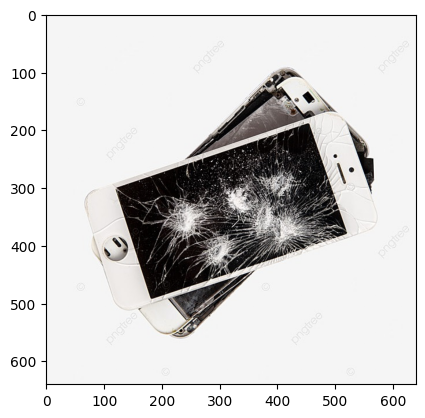

In [29]:
# Load and preprocess the test image
img_path = '/content/brokenimage.png'  # Replace with the actual path to your test image
img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
x_test = np.expand_dims(img, axis=0)
x_test = preprocess_input(x_test)

# Predict on the test image
preds = model.predict(x_test)

# Display the predicted probabilities for each class
print("Probabilities for each class:", preds)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Map the class index to the corresponding class label
class_labels = {0: 'earphones', 1: 'headphones', 2: 'phones'}  # Replace with your actual class labels

# Display the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

# Display the test image
my_image = imread(img_path)
imshow(my_image)

In [33]:
def get_local_pricing_info(e_waste_class, location):
    local_pricing_data = {
        'earphones': {'base_price': 5, 'weight_factor': 1.2, 'condition_factor': 0.5},
        'headphones': {'base_price': 10, 'weight_factor': 1.5, 'condition_factor': 0.8},
        'phones': {'base_price': 15, 'weight_factor': 1.8, 'condition_factor': 2.0},  # Adjusted condition_factor
        # Add more entries as needed
    }

    return local_pricing_data.get(e_waste_class, {})

def calculate_price(e_waste_class, weight, condition, location):
    pricing_info = get_local_pricing_info(e_waste_class, location)

    base_price = pricing_info.get('base_price', 0)
    weight_factor = pricing_info.get('weight_factor', 0)
    condition_factor = pricing_info.get('condition_factor', 0)

    final_price = base_price + (weight * weight_factor) + (condition_factor if condition == 'working' else 0)

    return final_price

# Example of how to use the function
e_waste_class = 'phones'  # Replace with the actual e-waste class
weight = 5.2  # Replace with the actual weight
condition = 'working'  # Replace with the actual condition ('working' or 'non-working')
location = 'California'  # Replace with the actual location

price = calculate_price(e_waste_class, weight, condition, location)
print(f"The calculated price is: ${price}")



The calculated price is: $26.36
